In [1]:
import pandas as pd

# Cargar dataset desde tu carpeta local
file_path = r"C:\Users\Oscar Ferreira\OneDrive - AUTO LINEAS AMERICA SA DE CV\Escritorio\MCD\4 - APRENDIZAJE AUT\insurance.csv"
df = pd.read_csv(file_path)

# Selección de variables de interés
vars_interes = ['age', 'bmi', 'children', 'charges', 'smoker']
df = df[vars_interes]

print(df.head())
print(df.info())
df



   age     bmi  children      charges smoker
0   19  27.900         0  16884.92400    yes
1   18  33.770         1   1725.55230     no
2   28  33.000         3   4449.46200     no
3   33  22.705         0  21984.47061     no
4   32  28.880         0   3866.85520     no
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   charges   1338 non-null   float64
 4   smoker    1338 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 52.4+ KB
None


,age,bmi,children,charges,smoker
0,19,27.900,0,16884.92400,yes
1,18,33.770,1,1725.55230,no
2,28,33.000,3,4449.46200,no
3,33,22.705,0,21984.47061,no
4,32,28.880,0,3866.85520,no
...,...,...,...,...,...
1333,50,30.970,3,10600.54830,no
1334,18,31.920,0,2205.98080,no
1335,18,36.850,0,1629.83350,no
1336,21,25.800,0,2007.94500,no


In [2]:
from scipy.stats import shapiro

normalidad = {}

for col in ['age', 'bmi', 'children', 'charges']:
    stat, p = shapiro(df[col])
    normalidad[col] = p

# Mostrar resultados
for var, p in normalidad.items():
    print(f"{var}: p-value = {p:.5f}")

for var, p in normalidad.items():
    if p > 0.05:
        print(f"{var}: ✅ Distribución paramétrica (no se rechaza normalidad)")
    else:
        print(f"{var}: ❌ Distribución NO paramétrica (se rechaza normalidad)")


age: p-value = 0.00000
bmi: p-value = 0.00003
children: p-value = 0.00000
charges: p-value = 0.00000
age: ❌ Distribución NO paramétrica (se rechaza normalidad)
bmi: ❌ Distribución NO paramétrica (se rechaza normalidad)
children: ❌ Distribución NO paramétrica (se rechaza normalidad)
charges: ❌ Distribución NO paramétrica (se rechaza normalidad)


In [3]:
import pandas as pd

num_cols = ['age','bmi','children','charges']
cat_cols = ['smoker']

# Descriptivos SOLO numéricos
desc = df[num_cols].describe().T
desc['median'] = df[num_cols].median()  # <- ya no incluye 'smoker'
print(desc)

# Descriptivos categóricos
print("\n=== Categórica: smoker ===")
print(df['smoker'].value_counts())
print((df['smoker'].value_counts(normalize=True)*100).round(2).astype(str) + '%')
df.describe()

           count          mean           std        min         25%       50%  \
age       1338.0     39.207025     14.049960    18.0000    27.00000    39.000   
bmi       1338.0     30.663397      6.098187    15.9600    26.29625    30.400   
children  1338.0      1.094918      1.205493     0.0000     0.00000     1.000   
charges   1338.0  13270.422265  12110.011237  1121.8739  4740.28715  9382.033   

                   75%          max    median  
age          51.000000     64.00000    39.000  
bmi          34.693750     53.13000    30.400  
children      2.000000      5.00000     1.000  
charges   16639.912515  63770.42801  9382.033  

=== Categórica: smoker ===
smoker
no     1064
yes     274
Name: count, dtype: int64
smoker
no     79.52%
yes    20.48%
Name: proportion, dtype: object


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010



=== Correlación Spearman ===
            age    bmi  children  charges
age       1.000  0.108     0.057    0.534
bmi       0.108  1.000     0.016    0.119
children  0.057  0.016     1.000    0.133
charges   0.534  0.119     0.133    1.000


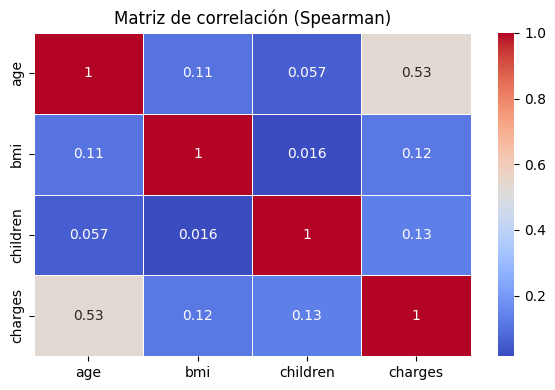

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[num_cols].corr(method='spearman')
print("\n=== Correlación Spearman ===")
print(corr.round(3))

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de correlación (Spearman)")
plt.tight_layout()
plt.show()


In [5]:
from scipy.stats import mannwhitneyu
import numpy as np

smoker_costs = df.loc[df['smoker']=='yes', 'charges']
nonsmoker_costs = df.loc[df['smoker']=='no', 'charges']

U, p = mannwhitneyu(smoker_costs, nonsmoker_costs, alternative='greater')
n1 = len(smoker_costs)
n2 = len(nonsmoker_costs)

# Tamaño de efecto: rank-biserial = 1 - 2U/(n1*n2)
rank_biserial = 1 - (2*U)/(n1*n2)

print(f"\nMann-Whitney U = {U:.0f}, p-value = {p:.6f}")
print(f"Tamaño de efecto (rank-biserial) = {rank_biserial:.3f}")



Mann-Whitney U = 284133, p-value = 0.000000
Tamaño de efecto (rank-biserial) = -0.949


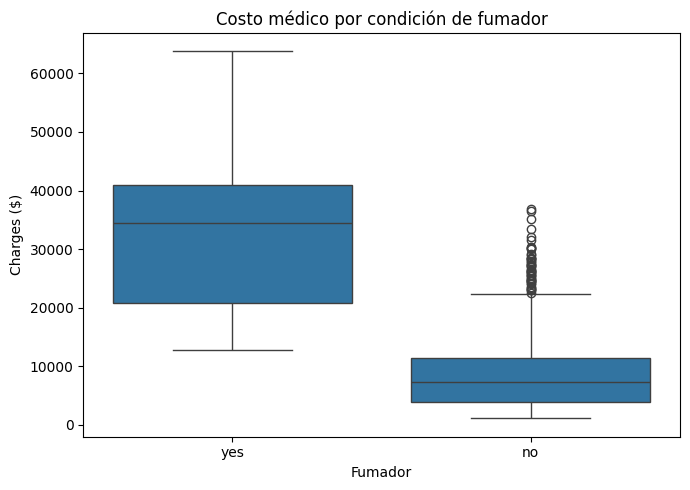

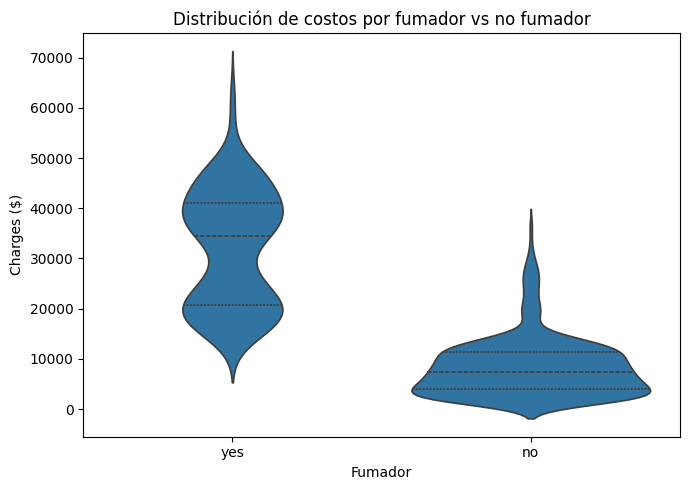

In [6]:
# Boxplot de charges por fumador
plt.figure(figsize=(7,5))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Costo médico por condición de fumador")
plt.xlabel("Fumador")
plt.ylabel("Charges ($)")
plt.tight_layout()
plt.show()

# Distribuciones comparadas (opcional: violin)
plt.figure(figsize=(7,5))
sns.violinplot(x='smoker', y='charges', data=df, inner='quartile')
plt.title("Distribución de costos por fumador vs no fumador")
plt.xlabel("Fumador")
plt.ylabel("Charges ($)")
plt.tight_layout()
plt.show()
